In [43]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import pickle

In [44]:
train = pd.read_csv("C:/Users/hp/SB/Disease Prediction/Data/Training.csv")
test = pd.read_csv("C:/Users/hp/SB/Disease Prediction/Data/Testing.csv")

In [45]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [46]:
train.shape

(4920, 134)

In [49]:
train['Unnamed: 133'].value_counts()

Series([], Name: Unnamed: 133, dtype: int64)

In [50]:
train.drop("Unnamed: 133",axis = 1, inplace = True)

In [51]:
train.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [52]:
train.isnull().sum().sum()

0

In [6]:
train.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [53]:
train.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [9]:
test.shape

(42, 133)

In [10]:
len(train.prognosis.unique())

41

In [11]:
train.prognosis.value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [12]:
for i in train.columns:
    print(train[i].value_counts())

0    4242
1     678
Name: itching, dtype: int64
0    4134
1     786
Name: skin_rash, dtype: int64
0    4812
1     108
Name: nodal_skin_eruptions, dtype: int64
0    4698
1     222
Name: continuous_sneezing, dtype: int64
0    4812
1     108
Name: shivering, dtype: int64
0    4122
1     798
Name: chills, dtype: int64
0    4236
1     684
Name: joint_pain, dtype: int64
0    4698
1     222
Name: stomach_pain, dtype: int64
0    4698
1     222
Name: acidity, dtype: int64
0    4812
1     108
Name: ulcers_on_tongue, dtype: int64
0    4812
1     108
Name: muscle_wasting, dtype: int64
0    3006
1    1914
Name: vomiting, dtype: int64
0    4704
1     216
Name: burning_micturition, dtype: int64
0    4812
1     108
Name: spotting_ urination, dtype: int64
0    2988
1    1932
Name: fatigue, dtype: int64
0    4806
1     114
Name: weight_gain, dtype: int64
0    4806
1     114
Name: anxiety, dtype: int64
0    4806
1     114
Name: cold_hands_and_feets, dtype: int64
0    4692
1     228
Name: mood_swings, dty

In [13]:
train['fluid_overload'].unique()

array([0], dtype=int64)

In [14]:
train.drop('fluid_overload',axis = 1, inplace = True)

In [15]:
corr = train.corr()
corr.style.background_gradient('coolwarm')

In [16]:
train.drop(['weight_gain','cold_hands_and_feets','anxiety','irregular_sugar_level',
           'yellow_urine','acute_liver_failure','swelling_of_stomach',
           'drying_and_tingling_lips','continuous_feel_of_urine',
          'internal_itching','polyuria','mood_swings','receiving_unsterile_injections',
          'stomach_bleeding','prominent_veins_on_calf','loss_of_smell','throat_irritation',
          'redness_of_eyes','sinus_pressure','runny_nose','pain_during_bowel_movements',
          'pain_in_anal_region','cramps','bruising','enlarged_thyroid','brittle_nails',
          'swollen_extremeties','slurred_speech','distention_of_abdomen','fluid_overload.1',
          'skin_peeling','silver_like_dusting','small_dents_in_nails','blister',
          'red_sore_around_nose','bloody_stool','swollen_blood_vessels','hip_joint_pain',
          'painful_walking','spinning_movements','altered_sensorium','toxic_look_(typhos)'],axis =1, inplace = True)

In [17]:
corr = train.corr()
corr.style.background_gradient('coolwarm')

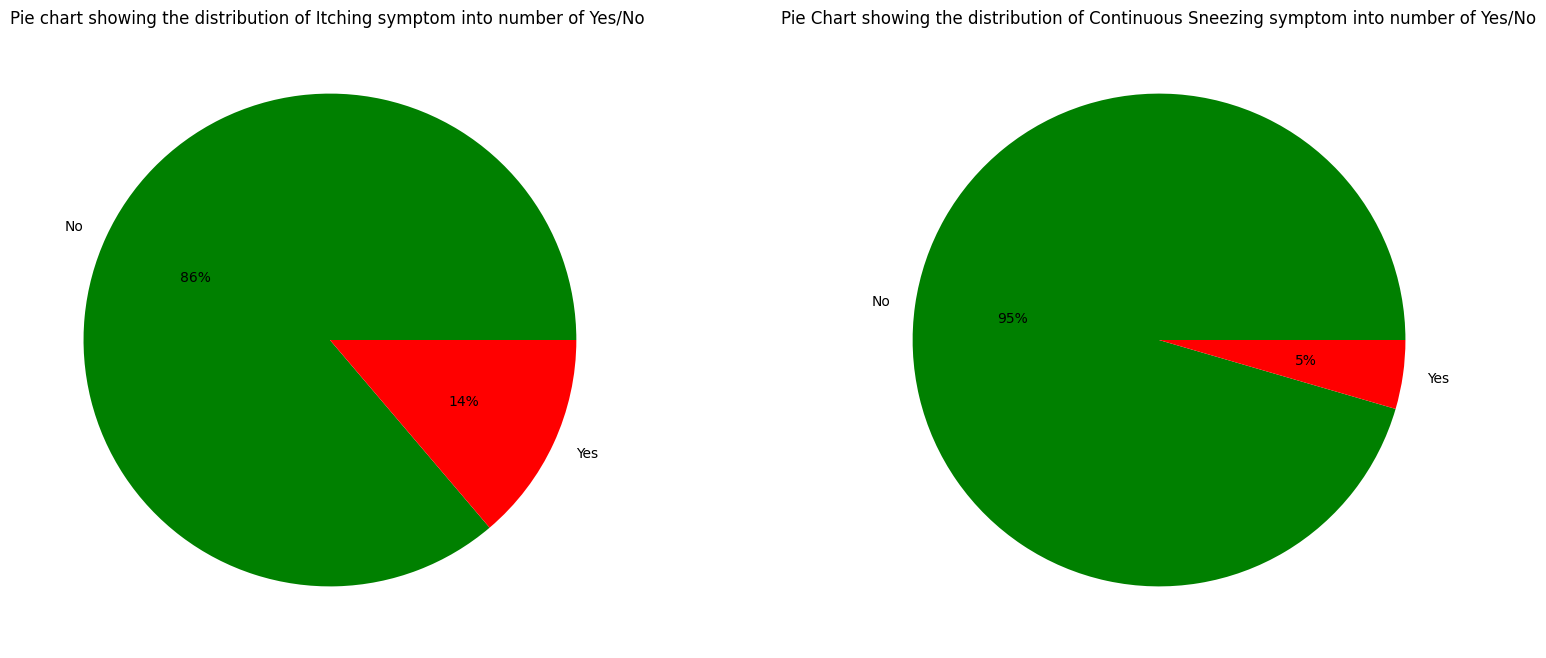

In [18]:
plt.figure(figsize = (8,8))

a = train['itching'].value_counts()
plt.subplot(121)
plt.pie(x = a, data = train, labels= ['No','Yes'], autopct='%.0f%%',colors = 'gr')
plt.title("Pie chart showing the distribution of Itching symptom into number of Yes/No ")

b = train['continuous_sneezing'].value_counts()
plt.subplot(122)
plt.pie(x = b, data = train, labels= ['No','Yes'], autopct='%.0f%%',colors = 'gr')
plt.title('Pie Chart showing the distribution of Continuous Sneezing symptom into number of Yes/No')

plt.subplots_adjust(left = 0.5, right = 2.4)

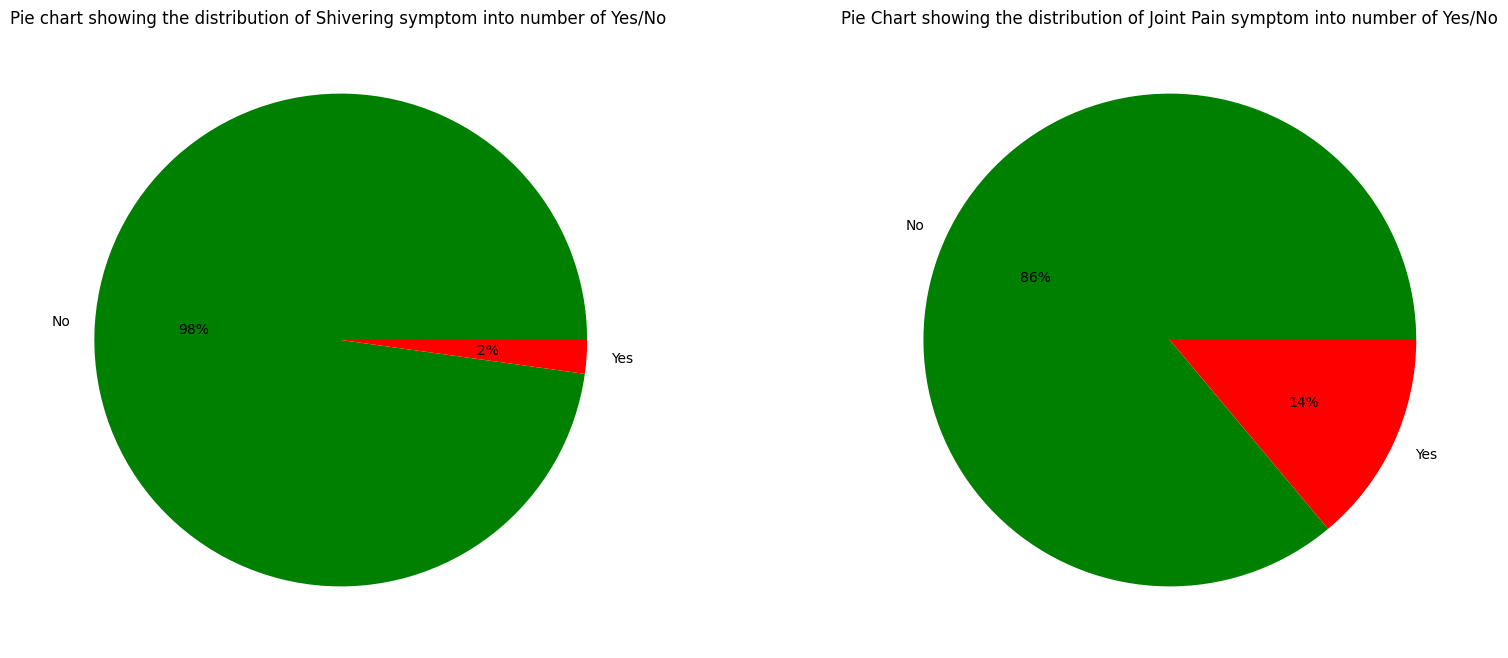

In [19]:
plt.figure(figsize = (8,8))

a = train['shivering'].value_counts()
plt.subplot(121)
plt.pie(x = a, data = train, labels= ['No','Yes'], autopct='%.0f%%',colors = 'gr')
plt.title("Pie chart showing the distribution of Shivering symptom into number of Yes/No ")

b = train['joint_pain'].value_counts()
plt.subplot(122)
plt.pie(x = b, data = train, labels= ['No','Yes'], autopct='%.0f%%',colors = 'gr')
plt.title('Pie Chart showing the distribution of Joint Pain symptom into number of Yes/No')

plt.subplots_adjust(left = 0.5, right = 2.4)

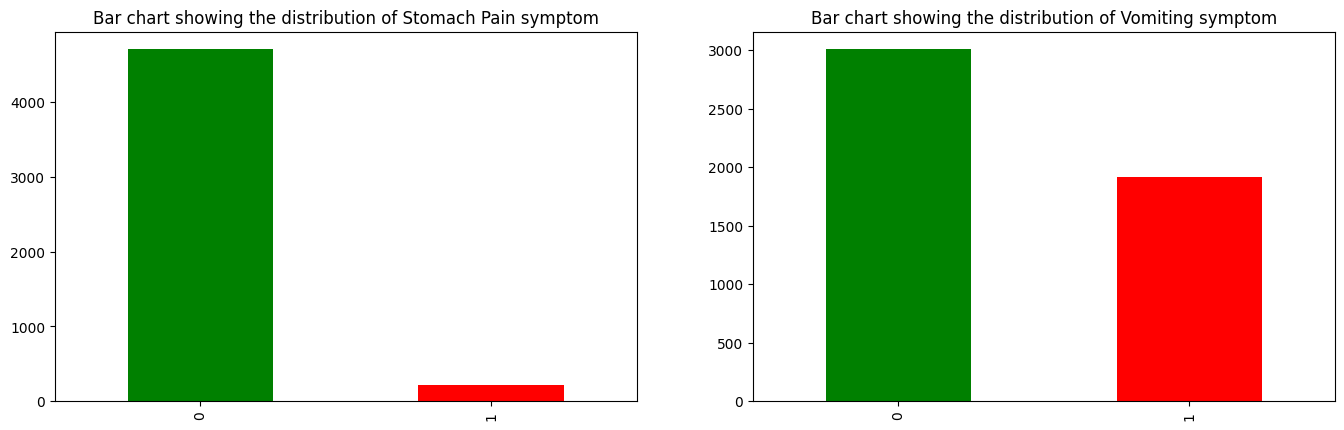

In [20]:
plt.subplot(1,2,1)
train['stomach_pain'].value_counts().plot(kind = 'bar', color = ['g','r'])
plt.title("Bar chart showing the distribution of Stomach Pain symptom")

plt.subplot(1,2,2)
train['vomiting'].value_counts().plot(kind = 'bar', color = ['g','r'])
plt.title("Bar chart showing the distribution of Vomiting symptom")

plt.subplots_adjust(left = 0.5, right = 2.5)

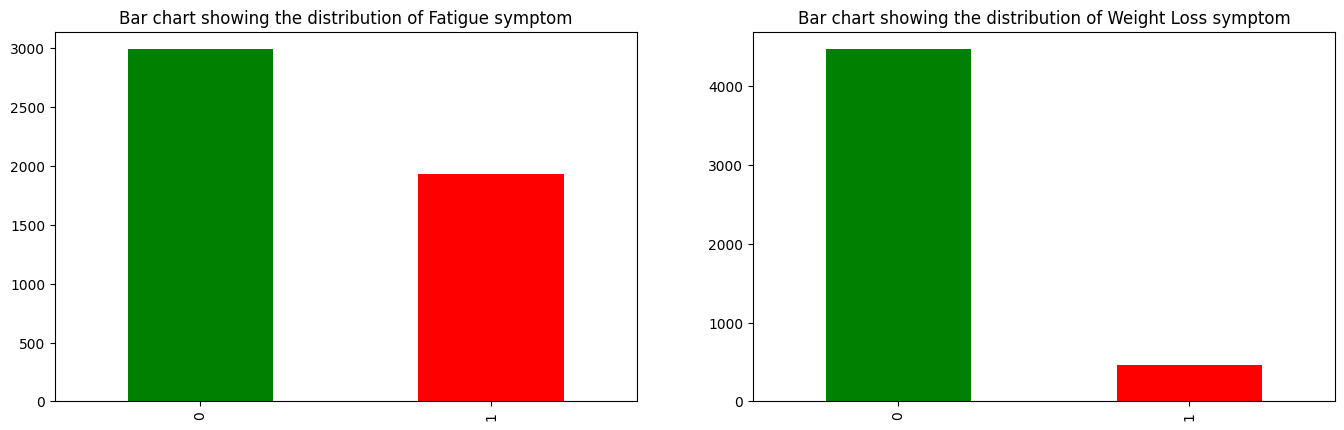

In [21]:
plt.subplot(1,2,1)
train['fatigue'].value_counts().plot(kind = 'bar', color = ['g','r'])
plt.title("Bar chart showing the distribution of Fatigue symptom")

plt.subplot(1,2,2)
train['weight_loss'].value_counts().plot(kind = 'bar', color = ['g','r'])
plt.title("Bar chart showing the distribution of Weight Loss symptom")

plt.subplots_adjust(left = 0.5, right = 2.5)

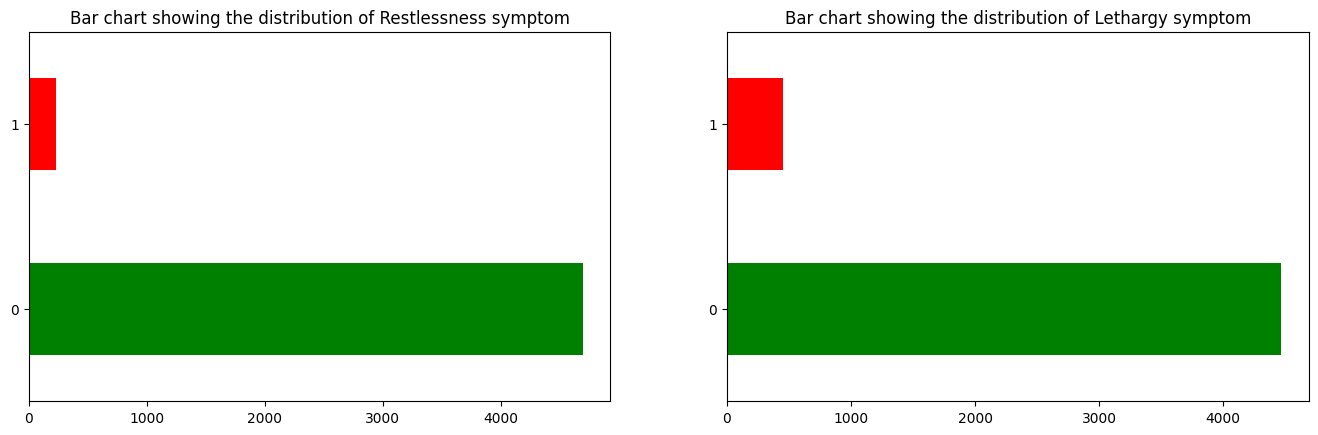

In [22]:
plt.subplot(1,2,1)
train['restlessness'].value_counts().plot(kind = 'barh', color = ['g','r'])
plt.title("Bar chart showing the distribution of Restlessness symptom")

plt.subplot(1,2,2)
train['lethargy'].value_counts().plot(kind = 'barh', color = ['g','r'])
plt.title("Bar chart showing the distribution of Lethargy symptom")

plt.subplots_adjust(left = 0.5, right = 2.5)

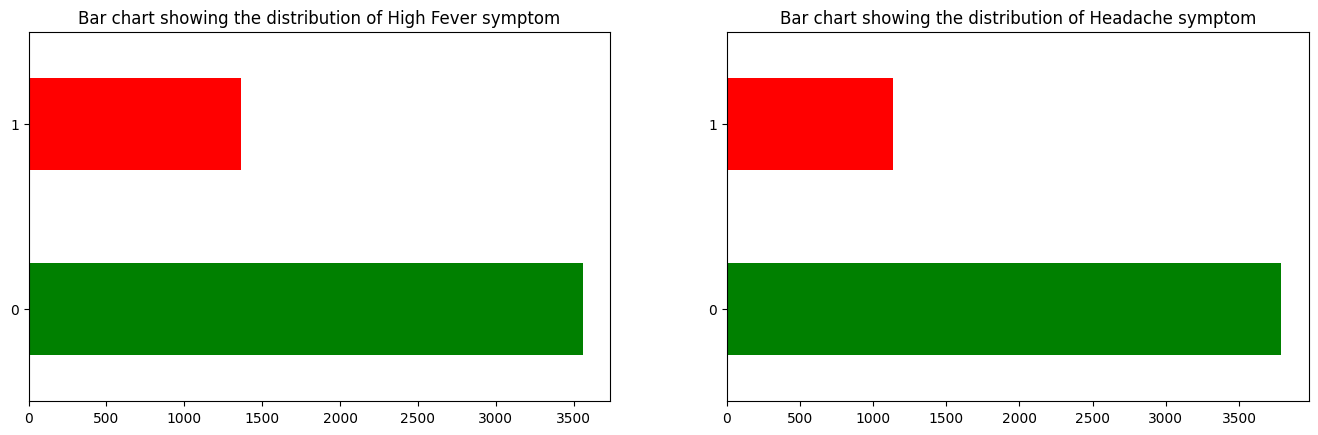

In [23]:
plt.subplot(1,2,1)
train['high_fever'].value_counts().plot(kind = 'barh', color = ['g','r'])
plt.title("Bar chart showing the distribution of High Fever symptom")

plt.subplot(1,2,2)
train['headache'].value_counts().plot(kind = 'barh', color = ['g','r'])
plt.title("Bar chart showing the distribution of Headache symptom")

plt.subplots_adjust(left = 0.5, right = 2.5)

In [24]:
train[(train['itching'] == 1) & (train['stomach_pain'] == 1)]

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,coma,history_of_alcohol_consumption,blood_in_sputum,palpitations,pus_filled_pimples,blackheads,scurring,inflammatory_nails,yellow_crust_ooze,prognosis
40,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
41,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
43,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
44,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
46,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4719,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
4760,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
4801,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
4842,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


Text(0.5, 1.0, 'Importance of Itching symptom to determine Fungal Infection')

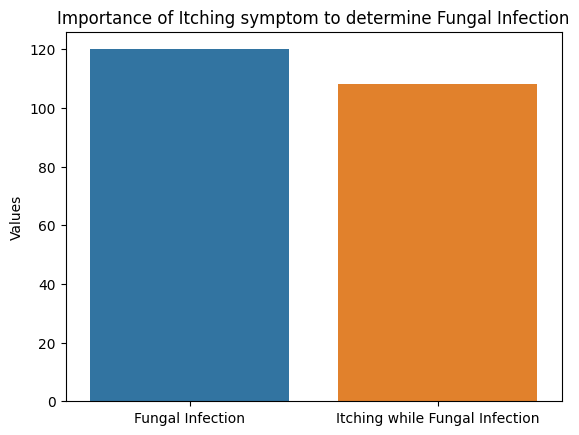

In [26]:
a = len(train[train['prognosis'] == 'Fungal infection'])
b = len(train[(train['itching'] == 1) & (train['prognosis'] == 'Fungal infection')])
fi = pd.DataFrame(data = [a,b], columns=['Values'],index = ['Fungal Infection','Itching while Fungal Infection'])

sns.barplot(data = fi, x = fi.index, y = fi['Values'])
plt.title('Importance of Itching symptom to determine Fungal Infection')

Text(0.5, 1.0, 'Importance of High Fever symptom to determine Jaundice')

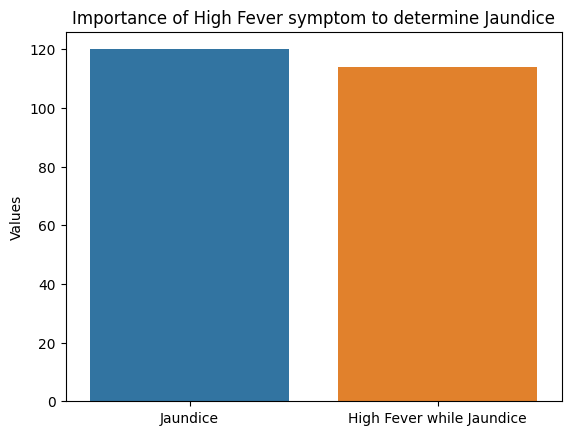

In [27]:
a = len(train[train['prognosis'] == 'Jaundice'])
b = len(train[(train['high_fever'] == 1) & (train['prognosis'] == 'Jaundice')])
fi = pd.DataFrame(data = [a,b], columns=['Values'],index = ['Jaundice','High Fever while Jaundice'])

sns.barplot(data = fi, x = fi.index, y = fi['Values'])
plt.title('Importance of High Fever symptom to determine Jaundice')

Text(0.5, 1.0, 'Importance of Yellowing of Eyes symptom to determine Tuberculosis')

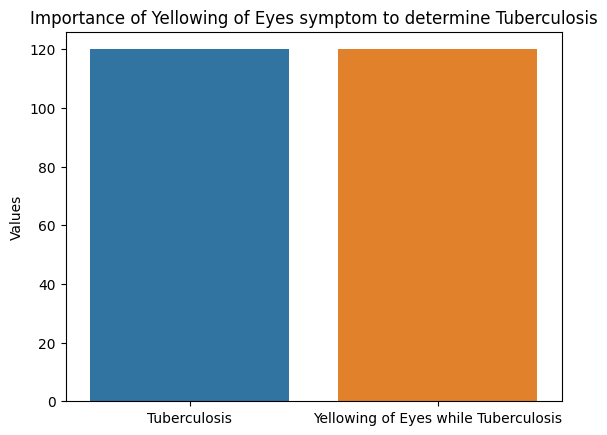

In [28]:

a = len(train[train['prognosis'] == 'Tuberculosis'])
b = len(train[(train['yellowing_of_eyes'] == 1) & (train['prognosis'] == 'Tuberculosis')])
fi = pd.DataFrame(data = [a,b], columns=['Values'],index = ['Tuberculosis','Yellowing of Eyes while Tuberculosis'])

sns.barplot(data = fi, x = fi.index, y = fi['Values'])
plt.title('Importance of Yellowing of Eyes symptom to determine Tuberculosis')

Text(0.5, 1.0, 'Importance of History of Consumption symptom to determine Alcoholic hepatitis')

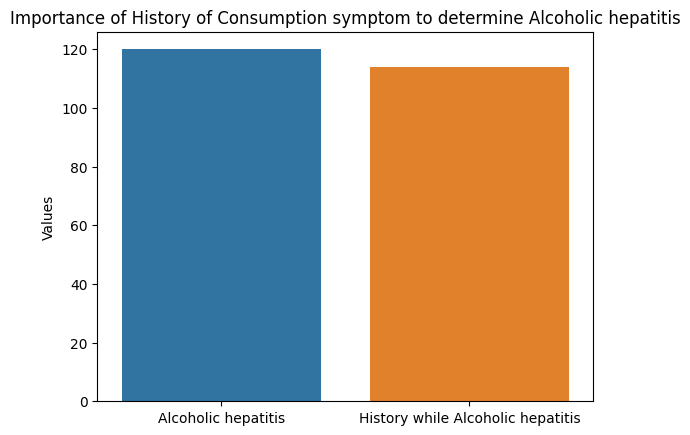

In [29]:

a = len(train[train['prognosis'] == 'Alcoholic hepatitis'])
b = len(train[(train['history_of_alcohol_consumption'] == 1) & (train['prognosis'] == 'Alcoholic hepatitis')])
fi = pd.DataFrame(data = [a,b], columns=['Values'],index = ['Alcoholic hepatitis','History while Alcoholic hepatitis'])

sns.barplot(data = fi, x = fi.index, y = fi['Values'])
plt.title('Importance of History of Consumption symptom to determine Alcoholic hepatitis')

In [35]:
a = train[train['prognosis'] == 'Tuberculosis']
a.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,coma,history_of_alcohol_consumption,blood_in_sputum,palpitations,pus_filled_pimples,blackheads,scurring,inflammatory_nails,yellow_crust_ooze,prognosis
250,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Tuberculosis
251,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Tuberculosis
252,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Tuberculosis
253,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Tuberculosis
254,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Tuberculosis


F:\Anacona\envs\yatin\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 51.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='weight_loss', ylabel='fatigue'>

F:\Anacona\envs\yatin\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 71.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


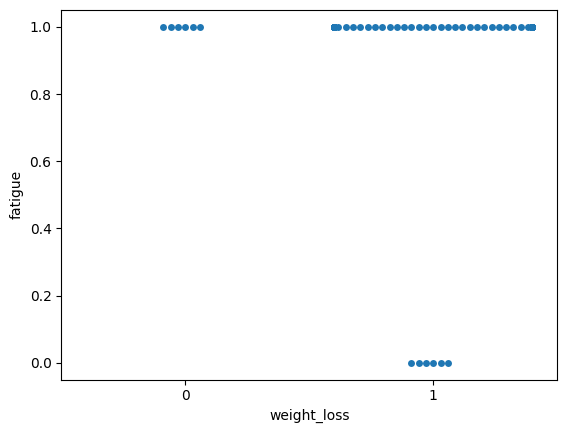

In [42]:
sns.swarmplot(x = a['weight_loss'], y = a['fatigue'])

In [ ]:
train.head()

In [18]:
def data_preprocessing(data):
    data.drop(['fluid_overload','weight_gain','cold_hands_and_feets','anxiety','irregular_sugar_level',
           'yellow_urine','acute_liver_failure','swelling_of_stomach',
           'drying_and_tingling_lips','continuous_feel_of_urine',
          'internal_itching','polyuria','mood_swings','receiving_unsterile_injections',
          'stomach_bleeding','prominent_veins_on_calf','loss_of_smell','throat_irritation',
          'redness_of_eyes','sinus_pressure','runny_nose','pain_during_bowel_movements',
          'pain_in_anal_region','cramps','bruising','enlarged_thyroid','brittle_nails',
          'swollen_extremeties','slurred_speech','distention_of_abdomen','fluid_overload.1',
          'skin_peeling','silver_like_dusting','small_dents_in_nails','blister',
          'red_sore_around_nose','bloody_stool','swollen_blood_vessels','hip_joint_pain',
          'painful_walking','spinning_movements','altered_sensorium','toxic_look_(typhos)'],axis =1, inplace = True)
    return data

In [19]:
X = train.drop('prognosis',axis = 1)
y = train.prognosis

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2)

In [21]:
test = data_preprocessing(test)

In [22]:
X_test = test.drop('prognosis',axis = 1)
y_test = test.prognosis

In [23]:
def model_evaluation(classifier):
    y_pred = classifier.predict(X_val)
    yt_pred = classifier.predict(X_train)
    y_pred1 = classifier.predict(X_test)
    print('The Training Accuracy of the algorithm is ', accuracy_score(y_train, yt_pred))
    print('The Validation Accuracy of the algorithm is ', accuracy_score(y_val, y_pred))
    print('The Testing Accuracy of the algorithm is', accuracy_score(y_test, y_pred1))
    return [(accuracy_score(y_train, yt_pred)), (accuracy_score(y_val, y_pred)), (accuracy_score(y_test, y_pred1))]

In [24]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [25]:
knn_results = model_evaluation(knn)

The Training Accuracy of the algorithm is  1.0
The Validation Accuracy of the algorithm is  1.0
The Testing Accuracy of the algorithm is 1.0


In [26]:
svm = SVC(C=1)
svm.fit(X_train, y_train)

SVC(C=1)

In [27]:
svm_results = model_evaluation(svm)

The Training Accuracy of the algorithm is  1.0
The Validation Accuracy of the algorithm is  1.0
The Testing Accuracy of the algorithm is 1.0


In [28]:
dtc = DecisionTreeClassifier(max_features= 10)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_features=10)

In [29]:
dtc_results = model_evaluation(dtc)

The Training Accuracy of the algorithm is  1.0
The Validation Accuracy of the algorithm is  1.0
The Testing Accuracy of the algorithm is 0.9761904761904762


In [30]:
rfc = RandomForestClassifier(max_depth = 13)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=13)

In [31]:
rfc_results = model_evaluation(rfc)

The Training Accuracy of the algorithm is  1.0
The Validation Accuracy of the algorithm is  1.0
The Testing Accuracy of the algorithm is 0.9761904761904762


In [32]:
results = pd.DataFrame(data = [knn_results, svm_results, dtc_results, rfc_results],
                      columns= ['Training Accuracy','Validation Accuracy', 'Testing Accuracy'],
                      index = ['K Nearest Neighbors Classifier','Support Vector Machines',
                               'Decision Trees Classifier', 'Random Forest Classifier'])

In [33]:
results

,Training Accuracy,Validation Accuracy,Testing Accuracy
K Nearest Neighbors Classifier,1.0,1.0,1.00000
Support Vector Machines,1.0,1.0,1.00000
Decision Trees Classifier,1.0,1.0,0.97619
Random Forest Classifier,1.0,1.0,0.97619


In [34]:
a = rfc.feature_importances_

In [35]:
col = X.columns

In [36]:
feat_imp = {}
for i, j in zip(a,col):
    feat_imp[j] = i

In [37]:
feat_imp

{'itching': 0.014906774548182978,
 'skin_rash': 0.004126193310423079,
 'nodal_skin_eruptions': 0.00506477497511548,
 'continuous_sneezing': 0.011950815998563227,
 'shivering': 0.01482441556258809,
 'chills': 0.008051206993917127,
 'joint_pain': 0.015897929037963693,
 'stomach_pain': 0.010154098478372642,
 'acidity': 0.008624253805092569,
 'ulcers_on_tongue': 0.007019300375694471,
 'muscle_wasting': 0.007044463040109562,
 'vomiting': 0.010611899915403056,
 'burning_micturition': 0.002027624623287407,
 'spotting_ urination': 0.005808412722595892,
 'fatigue': 0.017693005776644993,
 'weight_loss': 0.01923436830804702,
 'restlessness': 0.015069798433680767,
 'lethargy': 0.010629532760213844,
 'patches_in_throat': 0.008631735490068643,
 'cough': 0.008821405970258043,
 'high_fever': 0.013592813181931977,
 'sunken_eyes': 0.005731713251463125,
 'breathlessness': 0.007567280001571607,
 'sweating': 0.006338800581064726,
 'dehydration': 0.006099054276102206,
 'indigestion': 0.009224539294501882,
 

In [38]:
def model_evaluation1(n_feat,classifier):
    y_pred = classifier.predict(X1_val)
    yt_pred = classifier.predict(X1_train)
    y_pred1 = classifier.predict(X1_test)
    return [(n_feat),(accuracy_score(y1_train, yt_pred)), (accuracy_score(y1_test, y_pred1))]

In [39]:
rfc_results = []
knn_results = []

In [40]:
for main in [0.020,0.018,0.016,0.014,0.012,0.01,0.008]:
    to_drop = []
    for i,j in zip(feat_imp.keys(),feat_imp.values()):
        if j < main:
            to_drop.append(i)
    
    X_new = X.drop(to_drop,axis = 1)
    y_new = y
    X1_train, X1_val, y1_train, y1_val = train_test_split(X_new, y_new, test_size=0.2)
    X1_test = X_test.drop(to_drop,axis = 1)
    y1_test = y_test
    rfc_new = RandomForestClassifier()
    rfc_new.fit(X1_train, y1_train)
    temp1 = model_evaluation1(X1_train.shape[1], rfc_new)
    rfc_results.append(temp1)
    knn_new = KNeighborsClassifier()
    knn_new.fit(X1_train, y1_train)
    temp2 = model_evaluation1(X1_train.shape[1],knn_new)
    knn_results.append(temp2)

In [41]:
randomf = pd.DataFrame(data = rfc_results,columns=['Number of features','Training Accuracy','Testing Accuracy'])

In [42]:
randomf

,Number of features,Training Accuracy,Testing Accuracy
0,7,0.216463,0.214286
1,14,0.431148,0.428571
2,17,0.540650,0.547619
3,28,0.762957,0.761905
4,35,0.860010,0.880952
5,45,0.953506,0.976190
6,62,0.964939,0.952381


In [43]:
knn_table = pd.DataFrame(data = knn_results,columns=['Number of features','Training Accuracy','Testing Accuracy'])

In [44]:
knn_table

,Number of features,Training Accuracy,Testing Accuracy
0,7,0.211382,0.214286
1,14,0.426321,0.428571
2,17,0.536839,0.547619
3,28,0.759654,0.761905
4,35,0.857978,0.857143
5,45,0.927591,0.952381
6,62,0.964939,0.976190


In [45]:
to_drop = []
for i,j in zip(feat_imp.keys(),feat_imp.values()):
    if j < 0.01:
        to_drop.append(i)

In [46]:
len(to_drop)

44

In [47]:
X_new = X.drop(to_drop,axis = 1)
y_new = y

In [48]:
X_new.head()

,itching,continuous_sneezing,shivering,joint_pain,stomach_pain,vomiting,fatigue,weight_loss,restlessness,lethargy,...,increased_appetite,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,coma,history_of_alcohol_consumption,blood_in_sputum,palpitations,inflammatory_nails,yellow_crust_ooze
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X1_train, X1_val, y1_train, y1_val = train_test_split(X_new, y_new, test_size=0.2)
X1_test = X_test.drop(to_drop,axis = 1)
y1_test = y_test

In [50]:
rfc_new = RandomForestClassifier()
rfc_new.fit(X1_train, y1_train)

RandomForestClassifier()

In [51]:
y_pred = rfc_new.predict(X1_val)
yt_pred = rfc_new.predict(X1_train)
y_pred1 = rfc_new.predict(X1_test)
print('The Training Accuracy of the algorithm is ', accuracy_score(y1_train, yt_pred))
print('The Validation Accuracy of the algorithm is ', accuracy_score(y1_val, y_pred))
print('The Testing Accuracy of the algorithm is', accuracy_score(y1_test, y_pred1))

The Training Accuracy of the algorithm is  0.9550304878048781
The Validation Accuracy of the algorithm is  0.9542682926829268
The Testing Accuracy of the algorithm is 0.9761904761904762


In [52]:
knn_new = KNeighborsClassifier()
knn_new.fit(X1_train, y1_train)

KNeighborsClassifier()

In [53]:
y_pred = knn_new.predict(X1_val)
yt_pred = knn_new.predict(X1_train)
y_pred1 = knn_new.predict(X1_test)
print('The Training Accuracy of the algorithm is ', accuracy_score(y1_train, yt_pred))
print('The Validation Accuracy of the algorithm is ', accuracy_score(y1_val, y_pred))
print('The Testing Accuracy of the algorithm is', accuracy_score(y1_test, y_pred1))

The Training Accuracy of the algorithm is  0.953760162601626
The Validation Accuracy of the algorithm is  0.9532520325203252
The Testing Accuracy of the algorithm is 0.9761904761904762


In [54]:
test.join(pd.DataFrame(y_pred1,columns=["predicted"]))[["prognosis","predicted"]]

,prognosis,predicted
0,Fungal infection,Fungal infection
1,Allergy,Allergy
2,GERD,GERD
3,Chronic cholestasis,Chronic cholestasis
4,Drug Reaction,Drug Reaction
5,Peptic ulcer diseae,Peptic ulcer diseae
6,AIDS,AIDS
7,Diabetes,Diabetes
8,Gastroenteritis,Gastroenteritis
9,Bronchial Asthma,Bronchial Asthma


In [55]:
X1_train.sum(axis = 1).max()

10

In [56]:
X1_train.columns

Index(['itching', 'continuous_sneezing', 'shivering', 'joint_pain',
       'stomach_pain', 'vomiting', 'fatigue', 'weight_loss', 'restlessness',
       'lethargy', 'high_fever', 'headache', 'dark_urine', 'nausea',
       'pain_behind_the_eyes', 'constipation', 'abdominal_pain', 'diarrhoea',
       'mild_fever', 'yellowing_of_eyes', 'malaise', 'phlegm', 'congestion',
       'chest_pain', 'fast_heart_rate', 'neck_pain', 'dizziness',
       'puffy_face_and_eyes', 'knee_pain', 'muscle_weakness',
       'passage_of_gases', 'irritability', 'muscle_pain', 'belly_pain',
       'abnormal_menstruation', 'increased_appetite', 'lack_of_concentration',
       'visual_disturbances', 'receiving_blood_transfusion', 'coma',
       'history_of_alcohol_consumption', 'blood_in_sputum', 'palpitations',
       'inflammatory_nails', 'yellow_crust_ooze'],
      dtype='object')

In [57]:
pickle.dump(knn_new, open('model.pkl','wb'))